## Project description

The mobile operator Megaline has found out that many customers use archived tariffs. They want to build a system that can analyze customer behavior and offer users a new tariff: «Smart» or «Ultra».

You have data on the behavior of customers who have already switched to these tariffs (from the course project «Statistical Data Analysis»). It is necessary to build a model for the classification problem, which will select the appropriate tariff. Data preprocessing is not needed — you have already done it.

Build a model with the largest possible accuracy value. To successfully complete the project, you need to bring the proportion of correct answers to at least 0.75. Check the accuracy on the test sample yourself.

## Project instructions

Open the file with data and study it. The path to the file is: /datasets/us

Divide the initial data into training, validation and test samples.

Explore the quality of different models, changing hyperparameters. Summarize the findings of the study.

Check the quality of the model on the test sample.

Additional task: check the models for sanity. It's okay if it doesn't work out: this data is more complex than what you have worked with before.

## Data description
Each object in the dataset is information about one user's behavior for a month. It is known:

calls — the number of calls,
minutes — the total duration of calls in minutes,
messages — the number of SMS messages,
mb_used — the consumed Internet traffic in MB,
is_ultra — which tariff was used during the month («Ultra» — 1, «Smart» — 0).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.dummy import DummyClassifier

In [2]:
try:
    df = pd.read_csv('users_behavior.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [3]:
df.head(15)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
# There are no missing values.
df.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [6]:
# There are no duplicates.
df.duplicated().sum() 

0

In [5]:
df.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


<Axes: title={'center': 'Corr min and calls'}, xlabel='calls'>

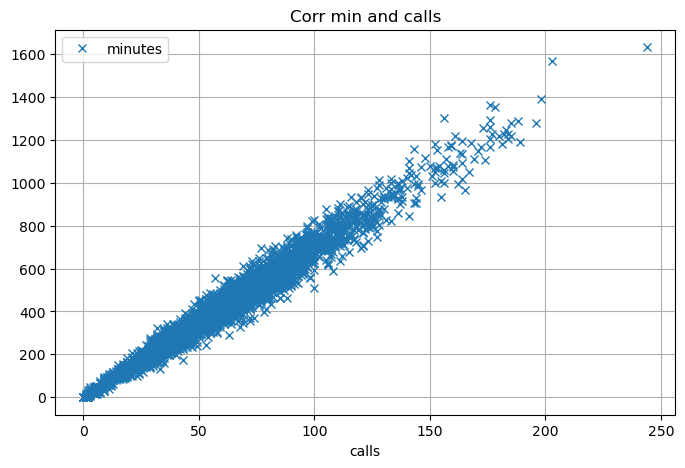

In [7]:
df.plot(x = 'calls',y = 'minutes',grid=True, style='x', figsize=(8, 5), title = 'Corr min and calls')


### Conclusion: we see a very strong relationship between minutes and calls.


#### The data is well-prepared, with no missing values or duplicates.

### Let's start the project.

We need to split the data into samples.

Since we don't have a test sample, we'll split the current sample into three: test, training, and validation, in a 3:1:1 ratio.

* 60% — training sample.
* 20% — test sample.
* 20% — validation sample.

In [8]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [9]:
features_train, features_b, target_train, target_b = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_test and target_test are the features and the target feature of the test sample.

features_valid and target_valid are the features and the target feature of the validation sample.

In [10]:
features_test, features_valid, target_test, target_valid = train_test_split(
    features_b, target_b, test_size=0.5, random_state=12345)

In [11]:
features_train.shape

(1928, 4)

print(df_train.shape)

In [12]:
features_test.shape

(643, 4)

In [13]:
features_valid.shape

(643, 4)

### Exploring the Quality of Different Models  
We will explore:
- Decision Tree
- Random Forest
- Logistic Regression

### DecisionTree

In [14]:
best_model = None
best_result = 0

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучите модель с заданной глубиной дерева
    
    model.fit(features_train, target_train) # обучите модель
    
    predictions = model.predict(features_valid) # получите предсказания модели
    
    result = accuracy_score(target_valid, predictions) # посчитайте качество модели
    
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
print('accuracy:', best_result, 'best_depth', best_depth)

accuracy: 0.7993779160186625 best_depth 7


In [66]:
best_model = None
best_result = 0



for depth in range(1, 11):
    for min_samples_leaf in range(1,11):
        for min_samples_split in range (1,11):
            for criterion in 'gini':
    
                model_2 =DecisionTreeClassifier(class_weight=None,
                                                criterion= criterion,
                                                max_depth= depth,
                                                min_samples_leaf=min_samples_leaf,
                                                min_samples_split=min_samples_split,
                                                random_state=12345) 
                model.fit(features_train, target_train) # обучите модель

                predictions = model.predict(features_valid) # получите предсказания модели

                result = accuracy_score(target_valid, predictions) # посчитайте качество модели


                if result > best_result:
                            best_model = model
                            best_result = result
                            best_depth = depth
                            best_params = [criterion,min_samples_leaf,min_samples_split]

        
        
print('Качество модели:', best_result, 'Наилучшая глубина', best_depth, 'Кол-во деревьев:',best_estimators,best_params)

Качество модели: 0.8009331259720062 Наилучшая глубина 1 Кол-во деревьев: 10 ['g', 1, 1]


### RandomForest

In [186]:
best_model = None
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators= est, max_depth=depth) # обучите модель с заданным количеством деревьев
    model.fit(features_train, target_train) # обучите модель на тренировочной выборке
    result = model.score(features_valid, target_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_model = model# сохраните наилучшую модель
        best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных

print("Качество модели:", best_result, 'Лучшая глубина', best_depth)

Качество модели: 0.8055987558320373 Лучшая глубина 7


In [68]:
best_model = None
best_result = 0
best_est = 0
for est in range(1, 11):
    for depth in range (1,11):
        model = RandomForestClassifier(random_state=12345,criterion='gini', n_estimators= est, max_depth=depth) # обучите модель с заданным количеством деревьев
        model.fit(features_train, target_train) # обучите модель на тренировочной выборке
        result = model.score(features_valid, target_valid) # посчитайте качество модели на валидационной выборке
        if result > best_result:
            best_model = model# сохраните наилучшую модель
            best_result = result#  сохраните наилучшее значение метрики accuracy на валидационных данных
            best_est = est

print("Качество модели:", best_result, 'Лучшая глубина', best_depth, 'Количество деревьев:', best_est,'Лучшая модель:',best_model)

Качество модели: 0.8133748055987559 Лучшая глубина 1 Количество деревьев: 8 Лучшая модель: RandomForestClassifier(max_depth=9, n_estimators=8, random_state=12345)


### LogisticRegression

In [188]:
model = LogisticRegression(random_state=12345, solver='lbfgs')# Напишите код здесь
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
result = model.score(features_train, target_train)
print('Качество модели',result)

Качество модели 0.7131742738589212


### Best Model:
1. RandomForest
2. DecisionTree
3. LogisticRegression

### Check the Model Quality on the Test Dataset

In [15]:
model = RandomForestClassifier(random_state=12345, n_estimators= 7, max_depth= 7) 
model.fit(features_train, target_train) 
result = model.score(features_test, target_test)
print('Качество модели на тестовых данных',result)

Качество модели на тестовых данных 0.7931570762052877


### Check the Models for Adequacy

From theory, it follows:
A model is considered adequate if it corresponds to the available experimental data. This means that choosing a more complex model will not improve its predictive properties: the existing model is sufficient.

Based on this, we can conclude that our model is exactly like that since it shows a quality of 0.8 on the test data. Let's import DummyClassifier.

In [16]:
strategies = ['most_frequent']

dummy_results = []

for strategy in strategies:
    dummy_classifire = DummyClassifier(strategy = strategy, random_state = 0)

dummy_classifire.fit(features_train, target_train)

result = dummy_classifire.score(features_test, target_test)

dummy_results.append({strategy: result})

pd.DataFrame(dummy_results)


,most_frequent
0,0.706065


### Conclusion: 
On the test data, the model performs better, confirming the adequacy of our model.

### Final Project Conclusion:
We examined three models (listed them in descending order of model accuracy):
1. RandomForest
2. DecisionTree
3. LogisticRegression

Additionally, we evaluated the model for adequacy and confirmed it. We conducted an assessment of the model on test data (the accuracy was slightly lower than on the validation data, which is normal).